In [1]:
import pandas as pd
import matplotlib as plt
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 20
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from vega_datasets import data

# Importing the SF Temperature Data:

In [2]:
sf = data.sf_temps()
sf.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


# <span style = 'color:blue'>San Francisco Exercises:</span>

## 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [3]:
sf = sf.set_index('date').sort_index()
sf

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


<AxesSubplot:xlabel='date'>

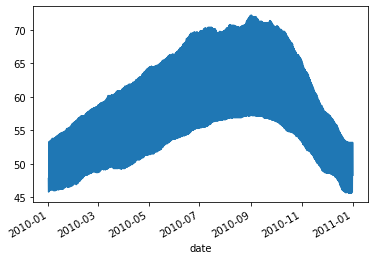

In [4]:
sf.temp.plot()

<AxesSubplot:xlabel='date'>

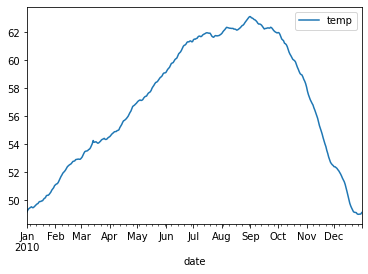

In [5]:
sf.resample('1D').mean().plot()

## 2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

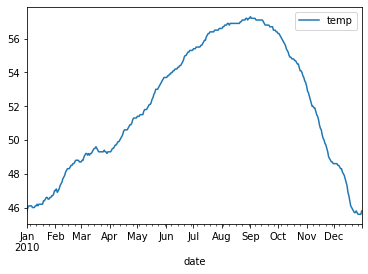

In [6]:
sf.resample('1D').min().plot()

## 3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

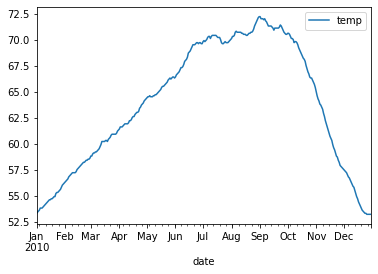

In [7]:
sf.resample('1D').max().plot()

## 4. Which month is the coldest, on average?

In [8]:
monthly = sf.resample('M').mean()
monthly

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


In [9]:
monthly.idxmin()

temp   2010-01-31
dtype: datetime64[ns]

In [10]:
# My original attempt is below. However, this isn't taking the mean temp for each of the months. 

In [11]:
monthly = sf.asfreq('M')
monthly['month_name'] = monthly.index.month_name()
monthly

,temp,month_name
date,,
2010-01-31,49.4,January
2010-02-28,51.0,February
2010-03-31,51.4,March
2010-04-30,53.0,April
2010-05-31,55.0,May
2010-06-30,56.6,June
2010-07-31,57.6,July
2010-08-31,58.8,August
2010-09-30,58.1,September


In [12]:
monthly[monthly.temp == monthly.temp.min()]

,temp,month_name
date,,
2010-12-31,47.7,December


## 5. Which month has the highest average temperature?

<AxesSubplot:xlabel='date'>

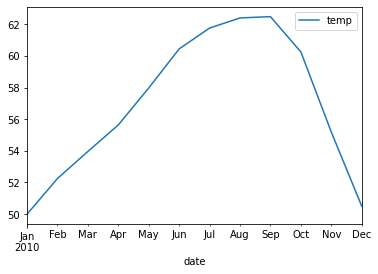

In [13]:
monthly = sf.resample('M').mean()
monthly.plot()

In [14]:
monthly.idxmax()

temp   2010-09-30
dtype: datetime64[ns]

## 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

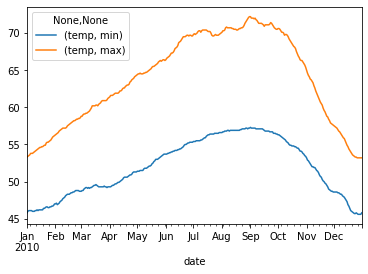

In [16]:
daily = sf.resample('D').agg(['min', 'max'])
daily.plot();

In [17]:
daily

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8
...          ...   ...
2010-12-27  45.6  53.2
2010-12-28  45.6  53.2
2010-12-29  45.6  53.2
2010-12-30  45.6  53.2
2010-12-31  45.8  53.2

[365 rows x 2 columns]

In [18]:
daily['diffr'] = daily['temp','max'] - daily['temp','min']

In [19]:
daily[daily['diffr'] == daily['diffr'].max()]

temp       diffr
             min   max      
date                        
2010-08-31  57.2  72.2  15.0

In [26]:
monthly_range = pd.DataFrame(daily.resample('M').mean().diffr)

In [28]:
monthly_range['month_name'] = monthly_range.index.month_name()

In [29]:
monthly_range

,diffr,month_name
date,,
2010-01-31,8.341935,January
2010-02-28,9.485714,February
2010-03-31,10.854839,March
2010-04-30,12.320000,April
2010-05-31,12.909677,May
2010-06-30,13.950000,June
2010-07-31,13.977419,July
2010-08-31,13.870968,August
2010-09-30,14.403333,September


In [34]:
monthly_range[monthly_range.diffr == monthly_range.diffr.max()]

,diffr,month_name
date,,
2010-09-30,14.403333,September


<AxesSubplot:xlabel='date'>

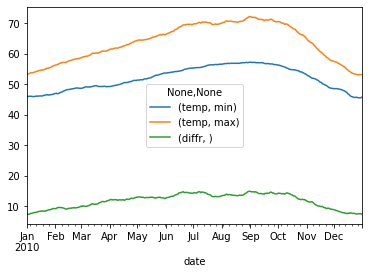

In [21]:
daily.plot()

## 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date'>

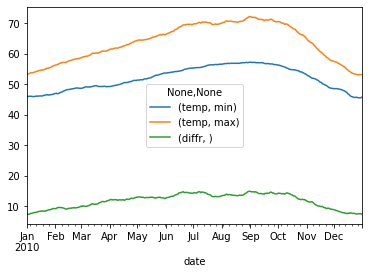

In [35]:
daily.plot()

# <span style = 'color:blue'>Seattle Exercises:</span>

In [43]:
sea = data.seattle_weather()
sea = sea.set_index('date')
sea.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


## 1. Which year and month combination has the highest amount of precipitation?

In [52]:
monthly_weather = sea.resample('M').mean()
monthly_weather[monthly_weather['precipitation'] == (monthly_weather['precipitation'].max())]

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,9.177419,8.380645,3.825806,4.341935


## 2. Visualize the amount of monthly precipitation over time.

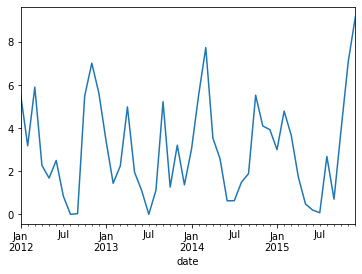

In [53]:
monthly_weather.precipitation.plot();

## 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

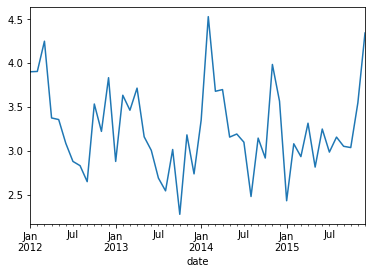

In [55]:
monthly_weather.wind.plot();

## 4. Which year-month combination is the windiest?

In [56]:
monthly_weather[monthly_weather['wind'] == (monthly_weather['wind'].max())]

,precipitation,temp_max,temp_min,wind
date,,,,
2014-02-28,5.542857,8.2,2.635714,4.528571


## 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [61]:
monthly_weather['year'] = monthly_weather.index.year
monthly_weather.head()

,precipitation,temp_max,temp_min,wind,year
date,,,,,
2012-01-31,5.590323,7.054839,1.541935,3.900000,2012
2012-02-29,3.182759,9.275862,3.203448,3.903448,2012
2012-03-31,5.903226,9.554839,2.838710,4.248387,2012
2012-04-30,2.270000,14.873333,5.993333,3.373333,2012
2012-05-31,1.683871,17.661290,8.190323,3.354839,2012


In [ ]:
monthly_weather.groupby('year').

## 6. In which month does it rain the most?

In [62]:
monthly_weather['month'] = monthly_weather.index.month_name()
monthly_weather.head()

,precipitation,temp_max,temp_min,wind,year,month
date,,,,,,
2012-01-31,5.590323,7.054839,1.541935,3.900000,2012,January
2012-02-29,3.182759,9.275862,3.203448,3.903448,2012,February
2012-03-31,5.903226,9.554839,2.838710,4.248387,2012,March
2012-04-30,2.270000,14.873333,5.993333,3.373333,2012,April
2012-05-31,1.683871,17.661290,8.190323,3.354839,2012,May


## 7. Which month has the most number of days with a non-zero amount of precipitation?

# <span style = 'color:blue'>Flight Data Exercises:</span>

## 1. Convert any negative delays to 0.

## 2. Which hour of the day has the highest average delay?

## 3. Does the day of the week make a difference in the delay amount?

## 4. Does the month make a difference in the delay amount?